In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression/validation/sad/23407.jpg
/kaggle/input/depression/validation/sad/29970.jpg
/kaggle/input/depression/validation/sad/19674.jpg
/kaggle/input/depression/validation/sad/29112.jpg
/kaggle/input/depression/validation/sad/8953.jpg
/kaggle/input/depression/validation/sad/17257.jpg
/kaggle/input/depression/validation/sad/11138.jpg
/kaggle/input/depression/validation/sad/6459.jpg
/kaggle/input/depression/validation/sad/23220.jpg
/kaggle/input/depression/validation/sad/35737.jpg
/kaggle/input/depression/validation/sad/30611.jpg
/kaggle/input/depression/validation/sad/7962.jpg
/kaggle/input/depression/validation/sad/12267.jpg
/kaggle/input/depression/validation/sad/28091.jpg
/kaggle/input/depression/validation/sad/2278.jpg
/kaggle/input/depression/validation/sad/5147.jpg
/kaggle/input/depression/validation/sad/35297.jpg
/kaggle/input/depression/validation/sad/28895.jpg
/kaggle/input/depression/validation/sad/20.jpg
/kaggle/input/depression/validation/sad/16895.jpg
/kaggle/

In [81]:
# Building the CNN to classify Mood of a Person

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [82]:
# Initialising the CNN
classifier = Sequential()

In [83]:
# Step 1 - Convolution - It is done to extract features by applying Filters.
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))

# input_shape = (64, 64, 1) that we are considering 64, 64 images of greyscale, 1 represents greyscale image.

In [84]:
# Step 2 - Pooling  - It is done to reduce the number of nuerons in the Flattening Step.
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [85]:
# Adding a Second Convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [86]:
# Step 3 - Flattening  - It is done to convert the Pooled Feature Map (2-D) into 1-D Input Array
classifier.add(Flatten())

In [87]:
# Step 4 - Full connection - It is building the simple ANN with the 1-D Feature Input (Get from Step-3).

# Adding a Hidden Layer in the CNN.
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'relu'))

# Adding a Output Layer in the CNN.
classifier.add(Dense(units = 2, activation = 'sigmoid'))

In [88]:
# Apply the ImageGenerator on the Image
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [89]:
# Getting the Data image from the directory.
training_set = train_datagen.flow_from_directory('/kaggle/input/depression/train',
                                                 target_size = (128, 128),
                                                 color_mode = 'grayscale',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/kaggle/input/depression/validation',
                                                 target_size = (128, 128),
                                                 color_mode = 'grayscale',
                                                 class_mode = 'categorical')

Found 12102 images belonging to 2 classes.
Found 2964 images belonging to 2 classes.


In [90]:
training_set.class_indices 

{'happy': 0, 'sad': 1}

In [91]:
classifier.summary()  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [92]:
from keras.callbacks import EarlyStopping
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
# Early stopping callback


import keras
from keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10, 
    min_delta=0.003, 
    mode='max'
)

In [106]:
from keras.callbacks import ModelCheckpoint
checkpoint_path = r"train_ckpt/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True, save_weights_only=True, verbose=1,
                                                 monitor='val_accuracy',mode='max')

In [119]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [95]:
model_history = classifier.fit(training_set,
                              steps_per_epoch =200,
                              epochs = 100,
                              validation_data = test_set,
                              validation_steps =2, callbacks=[cp_callback])

Epoch 1/100
200/200 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.6136
Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to train_ckpt/cp.ckpt
200/200 [==============================] - 76s 375ms/step - loss: 0.6617 - accuracy: 0.6136 - val_loss: 0.6364 - val_accuracy: 0.6250
Epoch 2/100
200/200 [==============================] - ETA: 0s - loss: 0.6021 - accuracy: 0.6688
Epoch 2: val_accuracy did not improve from 0.62500
200/200 [==============================] - 75s 374ms/step - loss: 0.6021 - accuracy: 0.6688 - val_loss: 0.7159 - val_accuracy: 0.5000
Epoch 3/100
200/200 [==============================] - ETA: 0s - loss: 0.5734 - accuracy: 0.6938
Epoch 3: val_accuracy improved from 0.62500 to 0.70312, saving model to train_ckpt/cp.ckpt
200/200 [==============================] - 76s 379ms/step - loss: 0.5734 - accuracy: 0.6938 - val_loss: 0.5237 - val_accuracy: 0.7031
Epoch 4/100
200/200 [==============================] - ETA: 0s - loss: 0.5466

In [109]:
# Save Model on the Disk

# serialize model to JSON
classifier_json = classifier.to_json()
with open('classifier.json', 'w') as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
classifier.save_weights("classifier.h5")
print("Saved model to disk")

Saved model to disk


In [110]:
# Retrieving the Saved Model
from keras.models import model_from_json

# load json and create model
json_file = open('classifier.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
classifier = model_from_json(loaded_model_json)
# load weights into new model
classifier.load_weights("classifier.h5")
print("Loaded model from disk")

Loaded model from disk


In [111]:
X_train, Y_train = training_set.next()    # Converting a DirectoryIterator to numpy array
print(type(X_train), "-----------", X_train.shape, Y_train.shape)

<class 'numpy.ndarray'> ----------- (32, 128, 128, 1) (32, 2)


In [112]:
X_train = X_train / 255.0  # To convert it into 255 pixel value that is grey scale image. 
print(X_train.shape)

(32, 128, 128, 1)


In [113]:
X_train[0].shape

(128, 128, 1)

In [114]:
X_train = X_train.reshape(len(X_train), 128, 128, 1)
print(X_train.shape)

(32, 128, 128, 1)


{'happy': 0, 'sad': 1}
[0. 1.]


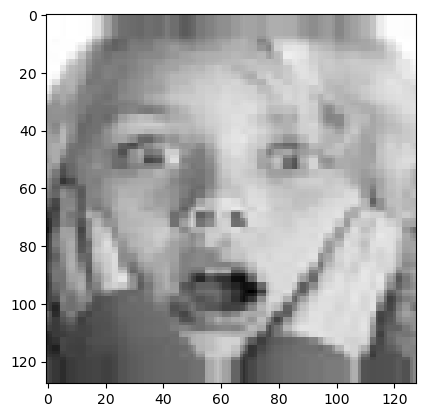

In [115]:
# Showing the Training Image

import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
print(training_set.class_indices)

for img in range(1, 2):
    test_image =img_to_array(X_train[img])
#     print(test_image.shape)
    
    test_image = np.reshape(test_image, (128, 128))       # test_image to be reshaped with (128, 128)
#     print(test_image.shape)
    
    plt.imshow(test_image, cmap='gray', interpolation='none')
    print(Y_train[img])

In [116]:
X_test, Y_test = test_set.next()
X_test = X_test.reshape(len(X_test), 128, 128, 1)
print(X_test.shape)
print(Y_test)
training_set.class_indices

(32, 128, 128, 1)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


{'happy': 0, 'sad': 1}

In [117]:
# Test Set Results----------
class_labels = ['happy','sad']

for img in range(X_test.shape[0]):
    test_image = X_test[img]
#     print("Img", img, test_image.shape)
    test_image = test_image.reshape((1, ) + test_image.shape)
#     print("Img", img, test_image.shape)
    result = classifier.predict(test_image)[0]
    predicted = class_labels[result.argmax()]
    print("Actual: ", class_labels[Y_test[img].argmax()], "and Predicted: ", predicted)

1/1 [==============================] - 0s 102ms/step
Actual:  happy and Predicted:  happy
1/1 [==============================] - 0s 29ms/step
Actual:  happy and Predicted:  happy
1/1 [==============================] - 0s 26ms/step
Actual:  sad and Predicted:  sad
1/1 [==============================] - 0s 29ms/step
Actual:  happy and Predicted:  happy
1/1 [==============================] - 0s 28ms/step
Actual:  happy and Predicted:  happy
1/1 [==============================] - 0s 30ms/step
Actual:  happy and Predicted:  happy
1/1 [==============================] - 0s 30ms/step
Actual:  happy and Predicted:  happy
1/1 [==============================] - 0s 29ms/step
Actual:  happy and Predicted:  happy
1/1 [==============================] - 0s 28ms/step
Actual:  happy and Predicted:  happy
1/1 [==============================] - 0s 28ms/step
Actual:  sad and Predicted:  happy
1/1 [==============================] - 0s 31ms/step
Actual:  happy and Predicted:  happy
1/1 [=====================

In [120]:
classifier.evaluate(  X_test, Y_test, verbose =1, callbacks =[cp_callback] )
tr=classifier.predict(X_train, verbose = 1, callbacks =[cp_callback] )
ts= classifier.predict(X_test,  verbose = 1, callbacks =[cp_callback] )


1/1 [==============================] - 0s 107ms/step


In [121]:
y_predict = tr.argmax(axis=-1) # this line convert the val of label from probabilty to normal
y_predict_tr= ts.argmax(axis=-1) 

1/1 [==============================] - 0s 94ms/step


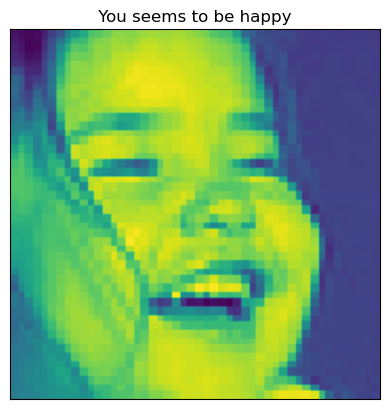

In [122]:
# Making a new Single prediction
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
org_image =load_img(r'/kaggle/input/depression/train/happy/10050.jpg', target_size = (128, 128), color_mode = "grayscale")
test_image =img_to_array(org_image)
test_image = test_image.reshape((1, ) + test_image.shape)
result = classifier.predict(test_image)[0]


predicted = class_labels[result.argmax()]
# print(predicted)

plt.xticks([])
plt.yticks([])
    
plt.title(" You seems to be {} ".format(predicted))
plt.show(plt.imshow(org_image))

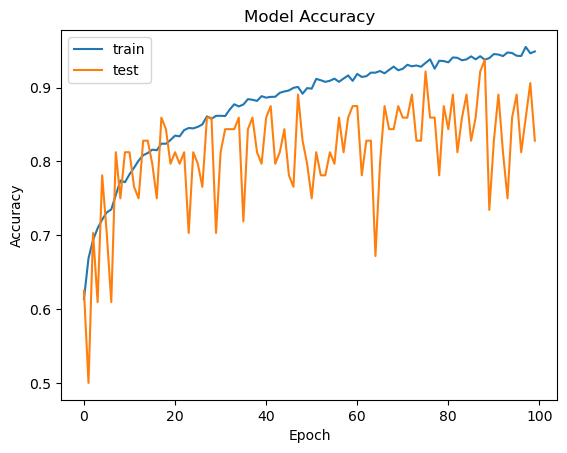

In [123]:
##acc

k = ''
if 'accuracy' in model_history.history :
    k = 'accuracy'    

if 'acc' in model_history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(model_history.history[k])
    plt.plot(model_history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


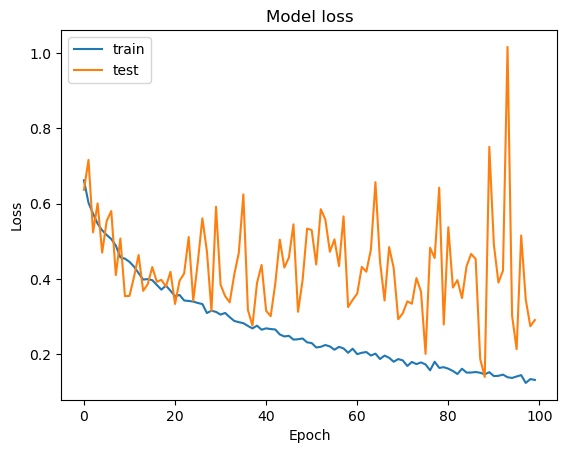

In [124]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


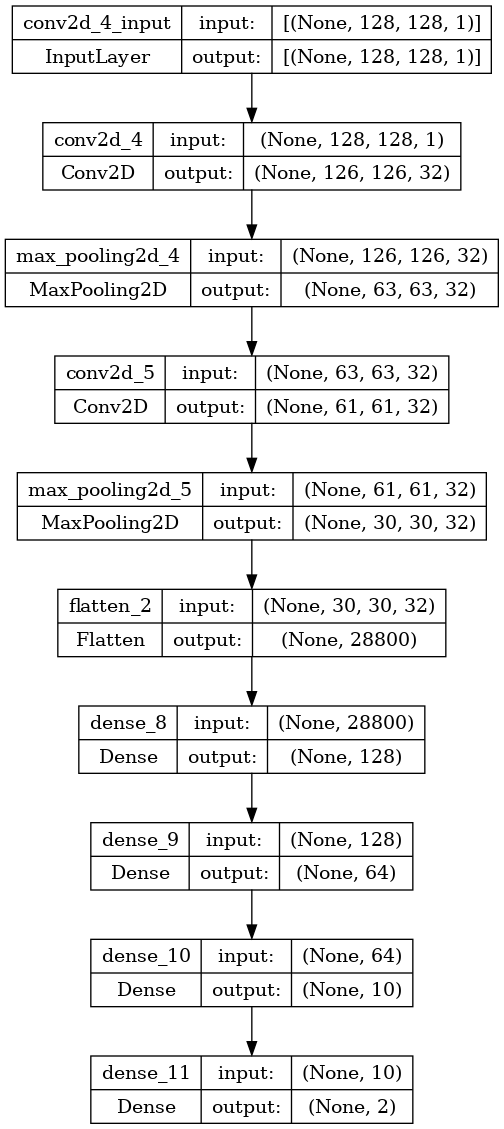

In [128]:
keras.utils.plot_model(classifier, show_shapes=True, show_layer_names=True)